In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
from pathlib import Path
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [27]:
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

GPU is available


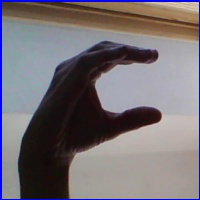

Image format is JPEG
Image size (horizontal and vertical size in pixels) is (200, 200)
Image mode is RGB


In [68]:
from PIL import Image
image = Image.open('data/train/C/C2.jpg')
display(image)
print(f'Image format is {image.format}')
print(f'Image size (horizontal and vertical size in pixels) is {image.size}')
print(f'Image mode is {image.mode}')

The Mode of the image is RGB which has 3 x 8-bit pixels and uses true color. 8-bit pixel has a range of 0-255 

## Checking if all the images are of same size, mode and format

In [4]:
no_issue = True
for idx, alphabet in enumerate(sorted(list(Path('data/train/').iterdir()))):
    label = alphabet.name
    images_list = list(alphabet.glob('*'))
    for image_path in images_list:
        image = Image.open(image_path)
        if image.format != 'JPEG' or image.size != (200, 200) or image.mode != 'RGB':
            print(image_path)
            print(f'Image format is {image.format}')
            print(f'Image size (horizontal and vertical size in pixels) is {image.size}')
            print(f'Image mode is {image.mode}')
            no_issue = False
if no_issue:
    print('All images are of same size, mode and format')

All images are of same size, mode and format


### Resizing (Work later on if needed)

Enlarged Image size (horizontal and vertical size in pixels) is (500, 500)
Shrinked Image size (horizontal and vertical size in pixels) is (40, 40)


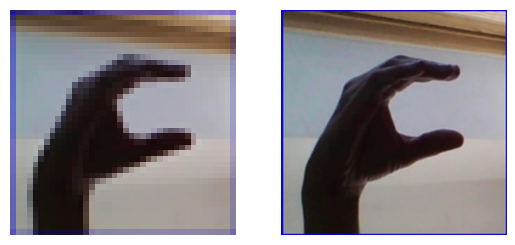

In [5]:
image = Image.open('data/train/C/C2.jpg')
enlarged_image = image.resize((500, 500))
shrinked_image = image.resize((40, 40))
print(f'Enlarged Image size (horizontal and vertical size in pixels) is {enlarged_image.size}')
print(f'Shrinked Image size (horizontal and vertical size in pixels) is {shrinked_image.size}')
for idx, img in enumerate([shrinked_image, enlarged_image]):
    plt.subplot(1, 2, idx+1)
    plt.title('')
    plt.axis('off')
    plt.imshow(img)

## Converting one image to array and analyzing pixel intensities

In [16]:
img = plt.imread('data/train/C/C2.jpg')
print(f'{img.shape}')
print(f'The total number of pixels in the image array is {img.size}')

(200, 200, 3)
The total number of pixels in the image array is 120000


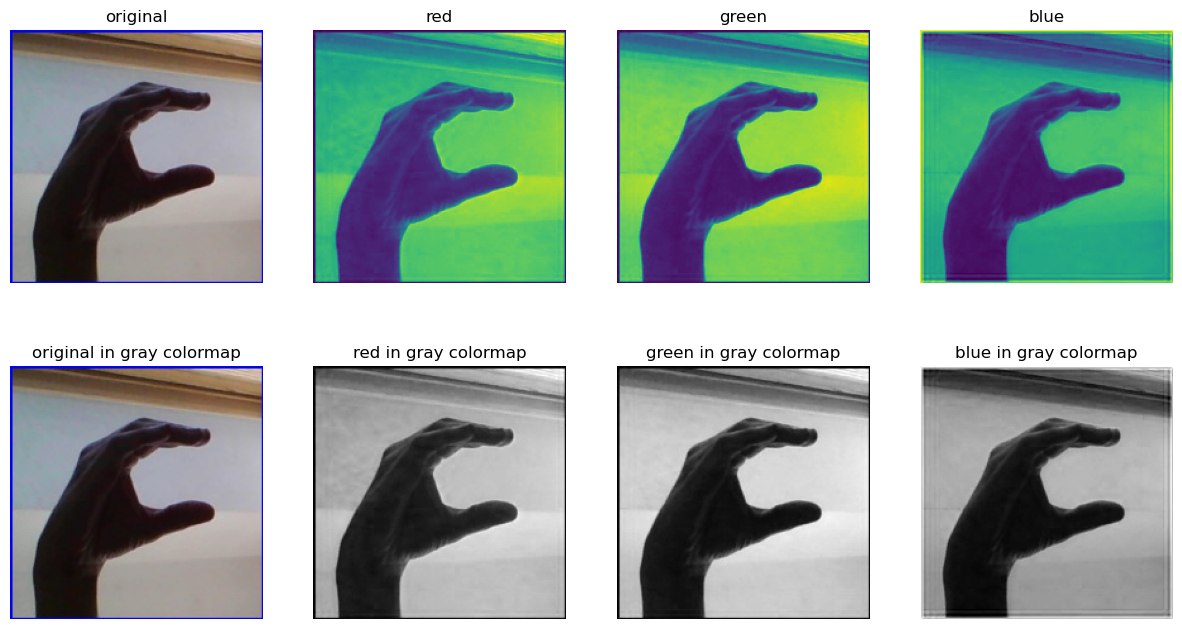

In [7]:
plt.figure(figsize=(15, 8))
for idx, (image, label) in enumerate([
                                    (img, 'original'), 
                                    (img[:, :, 0], 'red'), 
                                    (img[:, :, 1], 'green'), 
                                    (img[:, :, 2], 'blue')
                                    ]):
    plt.subplot(2, 4, idx+1)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
    
for idx, (image, label) in enumerate([
                                    (img, 'original in gray colormap'), 
                                    (img[:, :, 0], 'red in gray colormap'), 
                                    (img[:, :, 1], 'green in gray colormap'), 
                                    (img[:, :, 2], 'blue in gray colormap')
                                    ]):
    plt.subplot(2, 4, idx+5)
    plt.imshow(image, cmap='gray')
    plt.title(label)
    plt.axis('off')
plt.show()

Displaying the 256 different intensities of the original, red color channel, green color channel and blue color channel

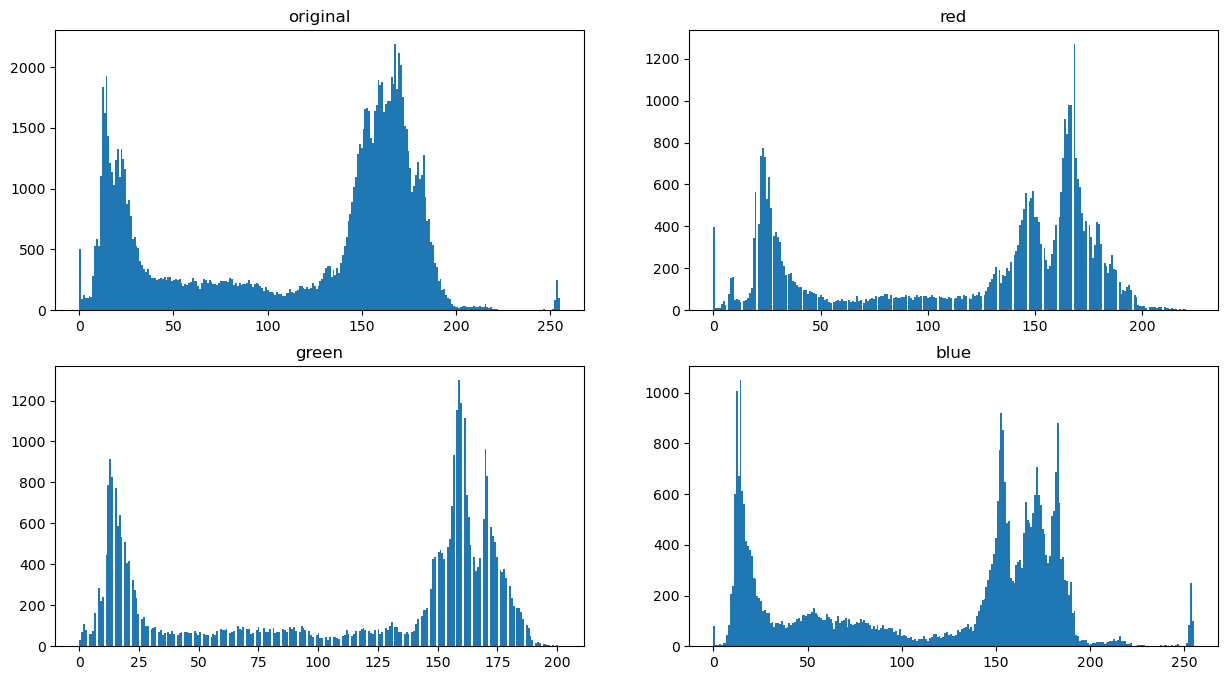

In [8]:
plt.figure(figsize=(15, 8))
for idx, (image, label) in enumerate([
                                    (img, 'original'), 
                                    (img[:, :, 0], 'red'), 
                                    (img[:, :, 1], 'green'), 
                                    (img[:, :, 2], 'blue')
                                    ]):
    plt.subplot(2, 2, idx+1)
    plt.title(label)
    plt.hist(image.ravel(), bins=256)
plt.show()

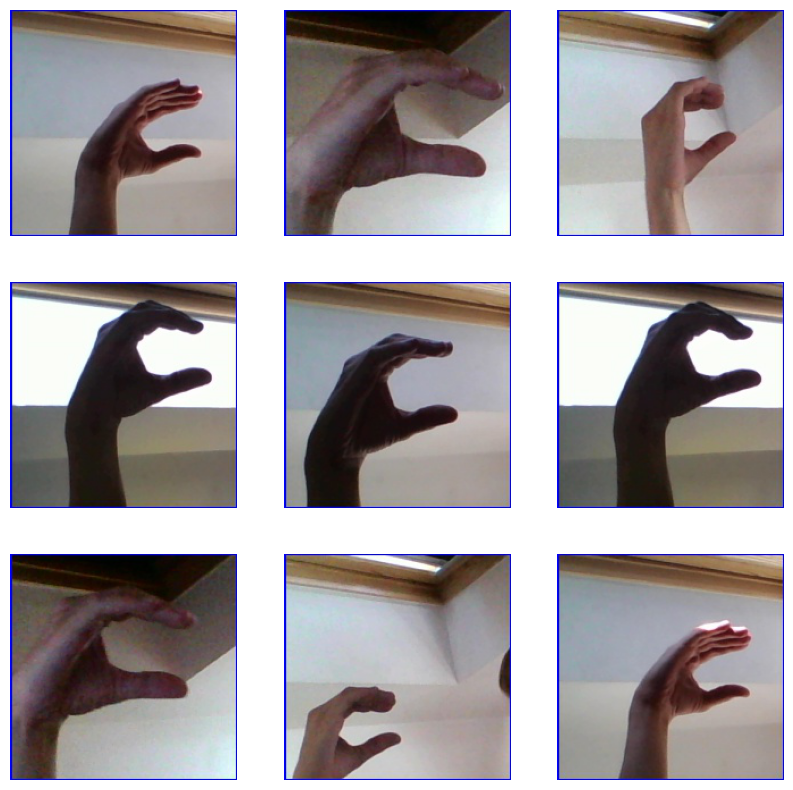

In [38]:
plt.figure(figsize=(10, 10))
images = [plt.imread(os.path.join('data/train/C', img_path)) for img_path in os.listdir('data/train/C')[:9]]
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))
    plt.axis("off")

## Converting image to array using keras

The array dimension is (1, 200, 200, 3)


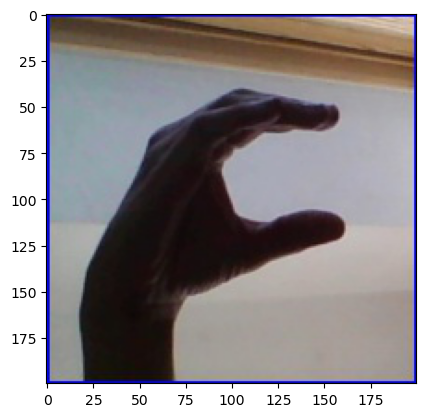

In [14]:
# from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# (
#     path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest"
# )
image = load_img('data/train/C/C2.jpg')
input_arr = img_to_array(image)
input_arr = np.array([input_arr]) # adding one more dimension to add it to the batch 
print(f'The array dimension is {input_arr.shape}')
plt.imshow(input_arr[0].astype(np.uint8))
plt.show()

## Reshaping (work on later)

In [ ]:
input_arr[0].transpose(2, 0, 1).shape

## Converting all images to array - Creating Dataset

In [41]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  Path('data/train'),
  image_size=(200, 200),
  crop_to_aspect_ratio=True,
  shuffle =False
)

Found 87000 files belonging to 29 classes.
Metal device set to: Apple M1 Pro


2022-11-21 12:58:09.451733: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-21 12:58:09.453786: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2022-11-21 12:58:10.907072: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7104


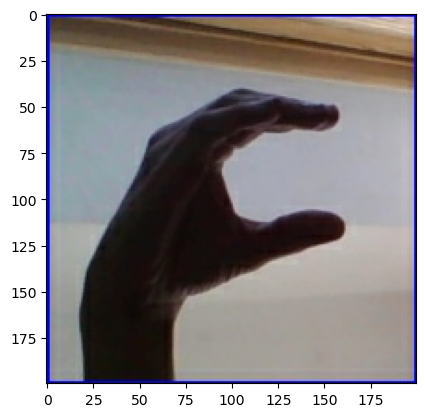

In [42]:
end = 0
for batch_no, (images, label) in enumerate(train_ds.as_numpy_iterator()):
    if end + 32 > train_ds.file_paths.index('data/train/C/C2.jpg'):
        print(end)
        idx = train_ds.file_paths.index('data/train/C/C2.jpg') - end
        
        test_img = images[idx]
        plt.imshow(test_img.astype("uint8"))
        break
    else:
        end += 32

In [35]:
import random
import numpy as np

from tensorflow.keras.preprocessing import image
from os import listdir
from os.path import isdir, join


def load_data(container_path='data/train', folders=[chr(ascii_val) for ascii_val in range(ord('A'), ord('Z')+1)] + ['del', 'nothing', 'space',],
              size=87000, test_split=0.2, seed=0):
    
    filenames, labels = [], []

    for label, folder in enumerate(folders):
        folder_path = join(container_path, folder)
        images = [join(folder_path, d)
                     for d in sorted(listdir(folder_path))]
        labels.extend(len(images) * [label])
        filenames.extend(images)
    
    random.seed(seed)
    data = list(zip(filenames, labels))
    random.shuffle(data)
    data = data[:size]
    filenames, labels = zip(*data)

    x = paths_to_tensor(filenames).astype('float32')/255
    y = np.array(labels)

    return x, y


def path_to_tensor(img_path, size):
    img = image.load_img(img_path, target_size=(size, size))
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths, size=64):
    list_of_tensors = [path_to_tensor(img_path, size) for img_path in img_paths]
    return np.vstack(list_of_tensors)

In [2]:
from tensorflow.keras.preprocessing import image
img = image.load_img('data/train/C/C2.jpg')
    # convert PIL.Image.Image type to 3D tensor
x = image.img_to_array(img)

In [26]:
x, y = load_data()

In [34]:
x.shape

(87000, 64, 64, 3)

In [36]:
np.savez("data/train_data", x=x, y=y)